# View Summit MMCR Mom files

This notebook will be for loading in MMCR Mom files that have been transferred from the ncas_radar_gws_vol2/data/ICECAPSarchive/mmcr/mom folder.

The worklow goes as such:
1. Move the desired files form the mmcr/mom/ directory to the desired endpoint directory (for example using `transfer_summit_data.ipynb`)
2. In the linux terminal run `unzip '*.zip'`, making sure to include the quotation marks '' around *.zip. This will inflate the .nc.zip files.
3. Remove the extra .zip files with `rm *.zip`
4. Run this notebook to open the files and display their data.

In [1]:
# intiial imports

import os
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import datetime as dt
import warnings

In [2]:
# determining where to load the data from
root_dir = '/gws/nopw/j04/ncas_radar_vol1/eeasm/ICESAT'
root_dir_steps = ['rgt_0749','cycle_10']

root_path = os.path.join(root_dir,*root_dir_steps)

In [3]:
# get the mmcr files in the directory
mmcr_path = os.path.join(root_path,'mmcr')

mmcr_files = [f for f in os.listdir(mmcr_path) if 'Mom.nc' in f]
print(*mmcr_files)

20210412200MMCRMom.nc 20210412300MMCRMom.nc 20210420000MMCRMom.nc 20210420100MMCRMom.nc 20210420200MMCRMom.nc


In [13]:
data = xr.open_dataset(os.path.join(mmcr_path,mmcr_files[0]))
data

<xarray.Dataset>
Dimensions:                        (time: 2251, mode: 10, heights: 234)
Dimensions without coordinates: time, mode, heights
Data variables: (12/44)
    base_time                      datetime64[ns] ...
    time_offset                    (time) datetime64[ns] ...
    ModeDescription                (mode) object ...
    RxCalTimeStamp                 (mode) float64 ...
    RxGain                         (mode) float32 ...
    SkyNoiseLevel                  (mode) float32 ...
    ...                             ...
    SpectralWidth                  (time, heights) float32 ...
    NoiseLevel                     (time, heights) float32 ...
    Reflectivity                   (time, heights) float32 ...
    RangeCorrectedPower            (time, heights) float32 ...
    CircularDepolarizationRatio    (time, heights) float32 ...
    AvgNoiseLevel                  (time) float32 ...
Attributes: (12/13)
    site_id:                           Summit
    facility_id:                       Summit
    radar_operating_frequency:         34.86 GHz
    radar_wavelength:                  8.600115e-003 m
    peak_transmitted_power:            52.54 dBm
    peak_transmitted_power_timestamp:  -1264424321 s
    ...                                ...
    twt_status_code:                   100000000
    comment:                           DOE/ARM SGP MMCR netcdf raw file
    resolution_description:            The resolution field attributes refer ...
    proc_level:                        a1
    history:                           created by LAP-XM
    comment_on_time:                   The time stamp comes at the beginning ...

(234, 2251)
min=-60.53473, max=9.96921e+36


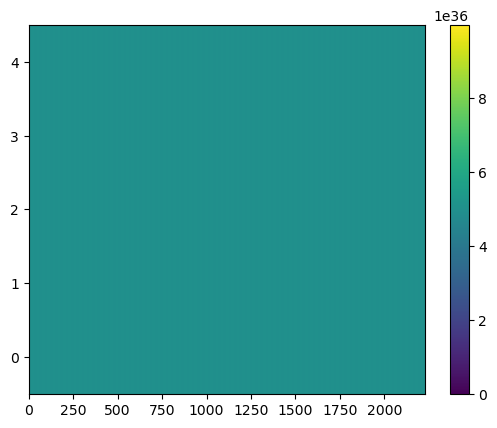

In [17]:
refl = data['Reflectivity'].values.T
print(refl.shape)

refl = refl[140:145,10:-10]


min = np.min(refl)
max = np.max(refl)
print(f'{min=}, {max=}')

im = plt.imshow(refl,origin='lower',aspect='auto')
plt.colorbar(mappable=im)

In [6]:
# load in the data as one big dataset
for i,fname in enumerate(mmcr_files):
    newdata = xr.open_dataset(os.path.join(mmcr_path,fname))
    if i:
        data = xr.concat([data,newdata],dim='time')
    else:
        data = newdata

data

/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/xarray/coding/variables.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/xarray/coding/variables.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/xarray/coding/variables.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/xarray/coding/variables.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise compariso

<xarray.Dataset>
Dimensions:                        (time: 11255, mode: 10, heights: 234)
Dimensions without coordinates: time, mode, heights
Data variables: (12/44)
    base_time                      (time) datetime64[ns] 2021-02-10T22:00:00 ...
    time_offset                    (time) datetime64[ns] 2021-02-10T00:00:00....
    ModeDescription                (time, mode) object b'CI' b'ST' ... b'' b''
    RxCalTimeStamp                 (time, mode) float64 1.612e+09 ... -2.147e+09
    RxGain                         (time, mode) float32 175.9 ... 9.969e+36
    SkyNoiseLevel                  (time, mode) float32 43.99 ... 9.969e+36
    ...                             ...
    SpectralWidth                  (time, heights) float32 0.2279 ... 9.969e+36
    NoiseLevel                     (time, heights) float32 63.34 ... 9.969e+36
    Reflectivity                   (time, heights) float32 -22.07 ... 9.969e+36
    RangeCorrectedPower            (time, heights) float32 -30.62 ... 9.969e+36
    CircularDepolarizationRatio    (time, heights) float32 9.969e+36 ... 9.96...
    AvgNoiseLevel                  (time) float32 9.969e+36 ... 9.969e+36
Attributes: (12/13)
    site_id:                           Summit
    facility_id:                       Summit
    radar_operating_frequency:         34.86 GHz
    radar_wavelength:                  8.600115e-003 m
    peak_transmitted_power:            52.54 dBm
    peak_transmitted_power_timestamp:  -1264424321 s
    ...                                ...
    twt_status_code:                   100000000
    comment:                           DOE/ARM SGP MMCR netcdf raw file
    resolution_description:            The resolution field attributes refer ...
    proc_level:                        a1
    history:                           created by LAP-XM
    comment_on_time:                   The time stamp comes at the beginning ...